# Portfolio Management

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

plt.style.use("ggplot")

## Portfolio Formation

We selected 10 representative U.S. tech and growth stocks for the period 2020-01-01 to 2024-12-31, and retrieved the daily stock data using the yfinance package:

In [31]:
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]
groups= []

for ticker in tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
    data.columns = data.columns.droplevel(1)  # Remove multi-level column index
    data.insert(0, "Ticker", ticker)  # Add ticker column
    data.reset_index(inplace=True)
    groups.append(data)

multidata = pd.concat(groups)
multidata
# Save to current working directory as 'multidata.csv'
multidata.to_csv("multidata.csv", index=False)

/tmp/ipykernel_59174/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_59174/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_59174/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_59174/779409262.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 comple

In [32]:
multidata

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2020-01-02,NVDA,5.971746,5.971746,5.892342,5.942872,237536000
1,2020-01-03,NVDA,5.876164,5.919973,5.827127,5.852019,205384000
2,2020-01-06,NVDA,5.900805,5.906032,5.756683,5.782819,262636000
3,2020-01-07,NVDA,5.972245,6.018045,5.884128,5.929182,314856000
4,2020-01-08,NVDA,5.983445,6.024765,5.927937,5.968012,277108000
...,...,...,...,...,...,...,...
1252,2024-12-23,NEM,37.758018,37.856964,37.065392,37.609597,8591600
1253,2024-12-24,NEM,37.906441,37.916334,37.471073,37.797599,3549300
1254,2024-12-26,NEM,37.688755,38.203278,37.688755,37.906439,5896400
1255,2024-12-27,NEM,37.441387,37.817385,37.114862,37.213810,5456100


### Data Cleaning Verification

In [33]:
print("Dataset Structure:")
multidata.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
Index: 12382 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12382 non-null  datetime64[ns]
 1   Ticker  12382 non-null  object        
 2   Close   12382 non-null  float64       
 3   High    12382 non-null  float64       
 4   Low     12382 non-null  float64       
 5   Open    12382 non-null  float64       
 6   Volume  12382 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 773.9+ KB


In [34]:
print("Missing Values per Column:")
print(multidata.isnull().sum())

Missing Values per Column:
Price
Date      0
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [35]:
multidata['Date'] = pd.to_datetime(multidata['Date'], dayfirst=True)
multidata.set_index('Date', inplace=True)
multidata

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,NVDA,5.971746,5.971746,5.892342,5.942872,237536000
2020-01-03,NVDA,5.876164,5.919973,5.827127,5.852019,205384000
2020-01-06,NVDA,5.900805,5.906032,5.756683,5.782819,262636000
2020-01-07,NVDA,5.972245,6.018045,5.884128,5.929182,314856000
2020-01-08,NVDA,5.983445,6.024765,5.927937,5.968012,277108000
...,...,...,...,...,...,...
2024-12-23,NEM,37.758018,37.856964,37.065392,37.609597,8591600
2024-12-24,NEM,37.906441,37.916334,37.471073,37.797599,3549300
2024-12-26,NEM,37.688755,38.203278,37.688755,37.906439,5896400


In [36]:
duplicate_rows = multidata[multidata.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows = multidata[multidata.duplicated(keep=False)]
print(duplicate_rows)

duplicate_dates = multidata[multidata.index.duplicated()]
print(f"Number of duplicate dates: {duplicate_dates.shape[0]}")
duplicate_dates = multidata[multidata.duplicated(keep=False)]
print(duplicate_dates)
print(f"Remaining duplicate rows: {multidata.duplicated().sum()}")

Number of duplicate rows: 0
Empty DataFrame
Columns: [Ticker, Close, High, Low, Open, Volume]
Index: []
Number of duplicate dates: 11125
Empty DataFrame
Columns: [Ticker, Close, High, Low, Open, Volume]
Index: []
Remaining duplicate rows: 0


In [37]:
multidata.isnull().sum()

Price
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Data Exploration

In [38]:
# Pivot the data to wide format (date as index, tickers as columns, closing prices)
wide_close = multidata.pivot(columns="Ticker", values="Close")

# Show the head and tail of the wide DataFrame
print("Head of closing prices:")
print(wide_close.head())

print("Tail of closing prices:")
print(wide_close.tail())

Head of closing prices:
Ticker            AMD       AVGO        COP        CVX        META  \
Date                                                                 
2020-01-02  49.099998  27.836229  53.489162  95.001541  208.635406   
2020-01-03  48.599998  27.128220  53.685261  94.672966  207.531464   
2020-01-06  48.389999  27.087631  54.322636  94.352173  211.440033   
2020-01-07  48.250000  26.994389  54.322636  93.147369  211.897522   
2020-01-08  47.830002  26.657646  53.064247  92.083359  214.045746   

Ticker            MSFT        NEM      NVDA  PLTR        TSM  
Date                                                          
2020-01-02  153.042282  36.490917  5.971746   NaN  54.292786  
2020-01-03  151.136627  36.161633  5.876164   NaN  52.502323  
2020-01-06  151.527328  36.524696  5.900805   NaN  51.896450  
2020-01-07  150.145752  36.499355  5.972245   NaN  52.737423  
2020-01-08  152.537354  35.528404  5.983445   NaN  53.126263  
Tail of closing prices:
Ticker             A

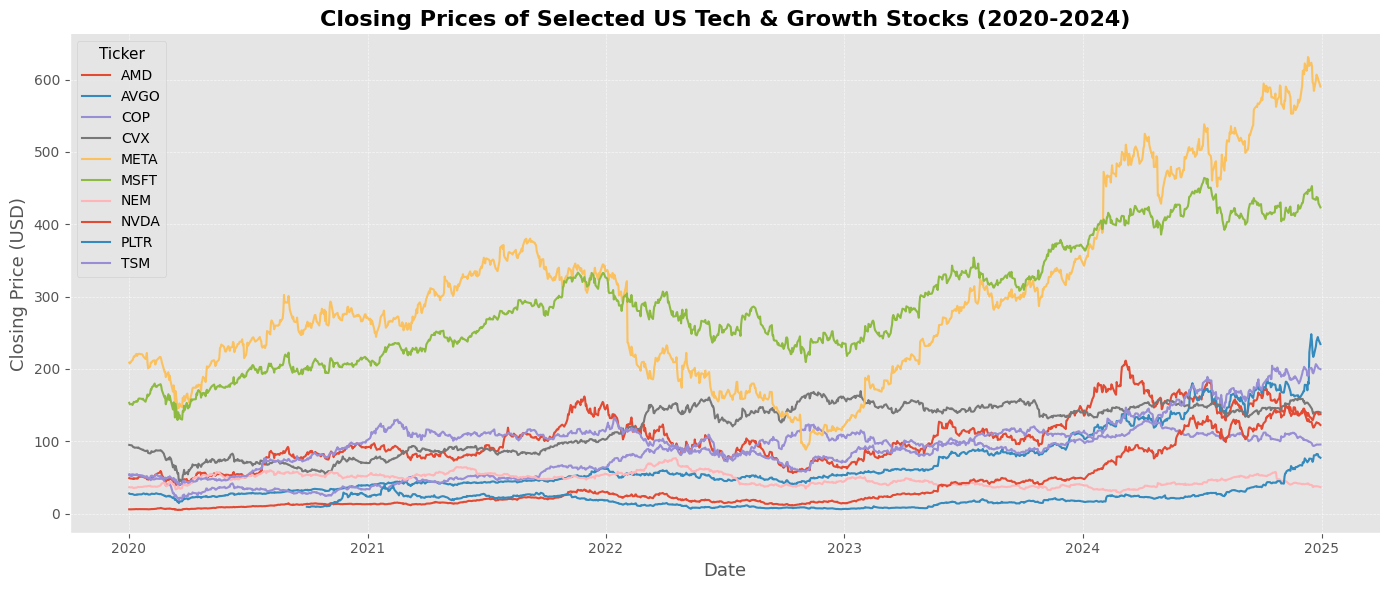

In [39]:
plt.figure(figsize=(14, 6))
for ticker in wide_close.columns:
    plt.plot(wide_close.index, wide_close[ticker], label=ticker)

plt.title("Closing Prices of Selected US Tech & Growth Stocks (2020-2024)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Closing Price (USD)", fontsize=13)
plt.legend(title="Ticker", loc="upper left", fontsize=10, title_fontsize=11, frameon=True)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

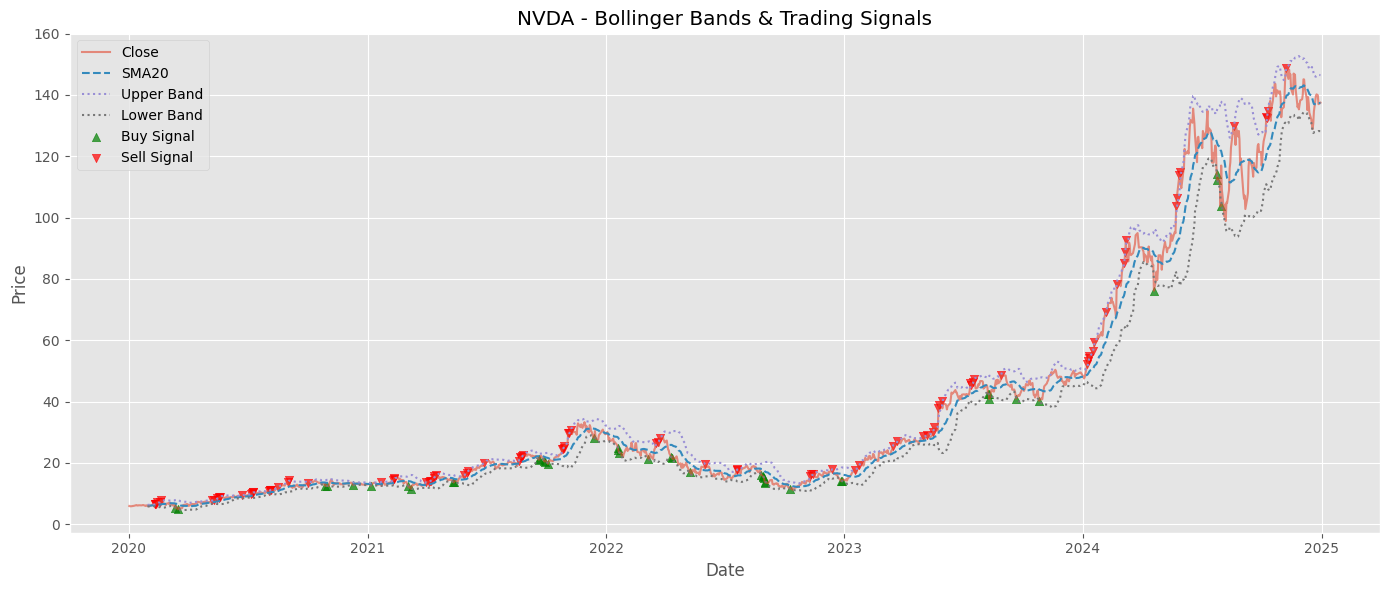

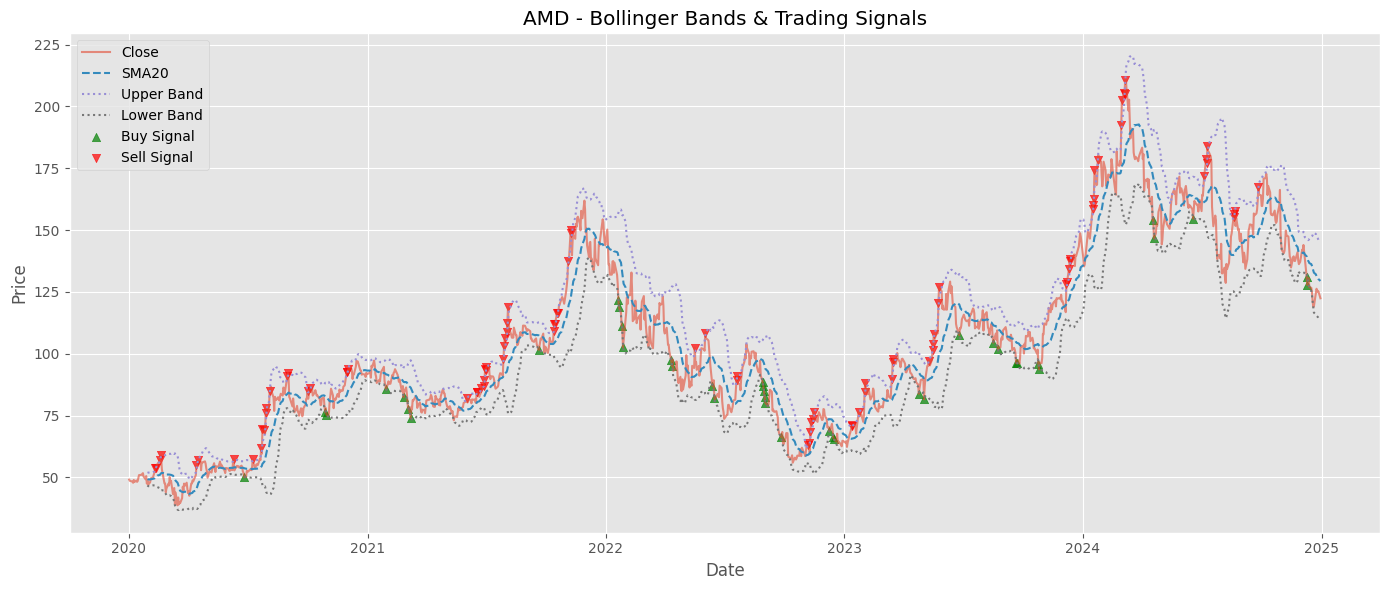

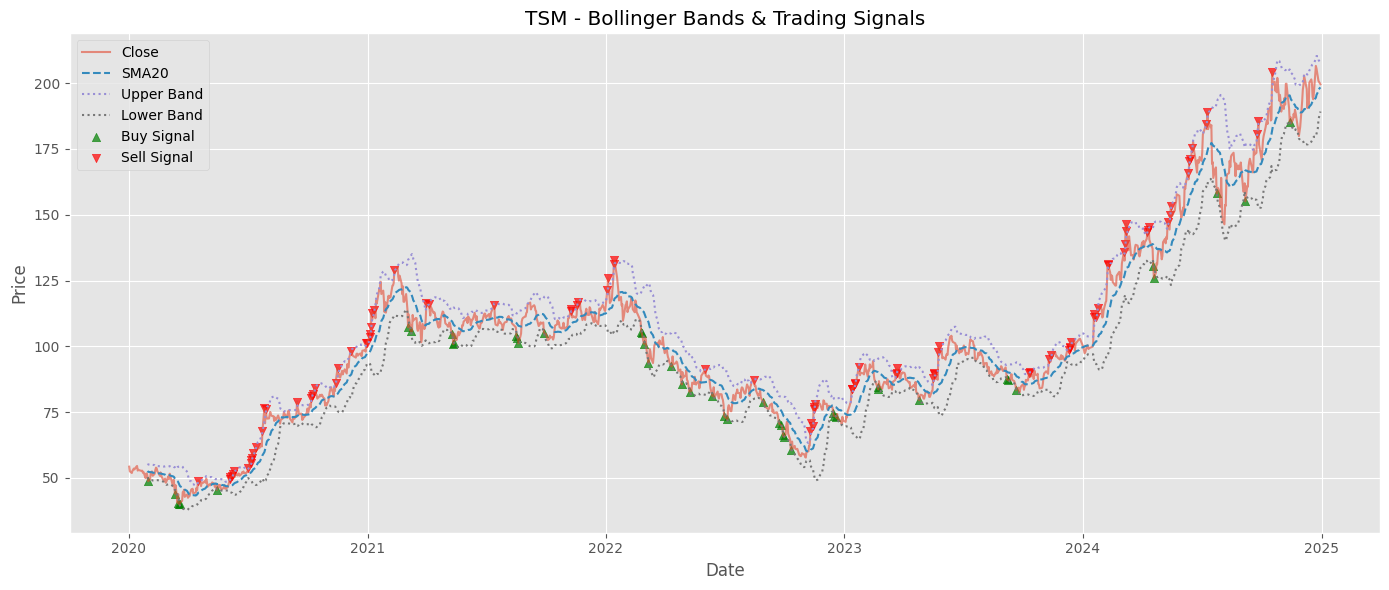

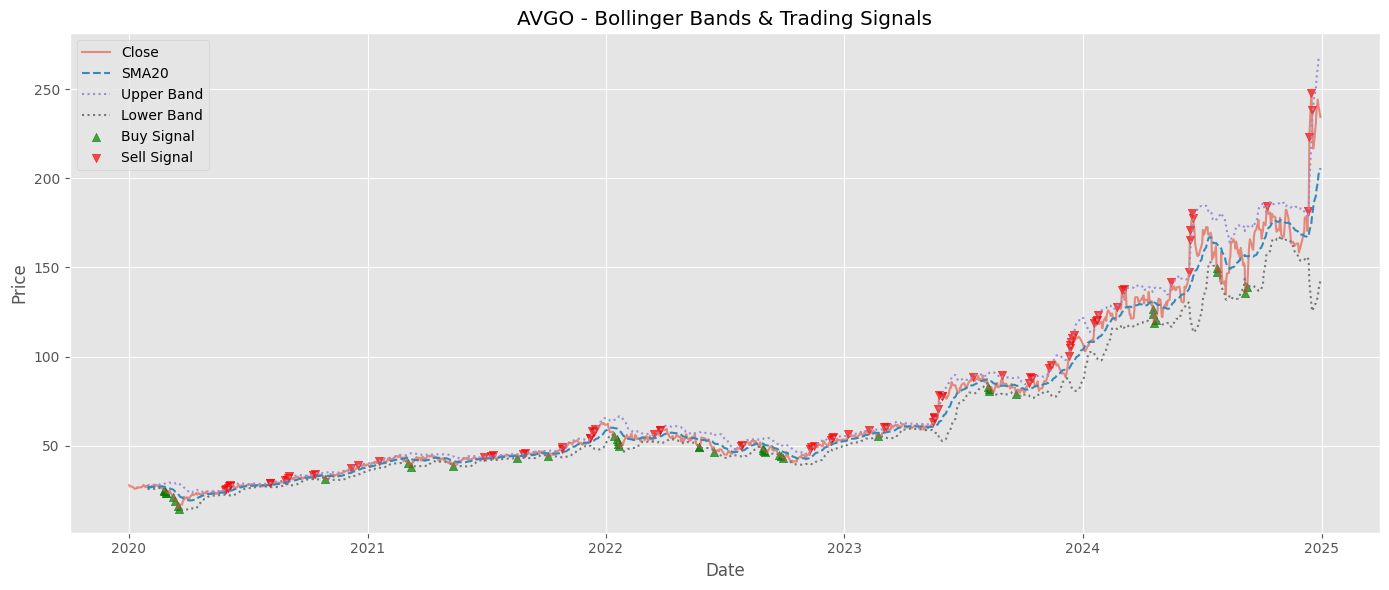

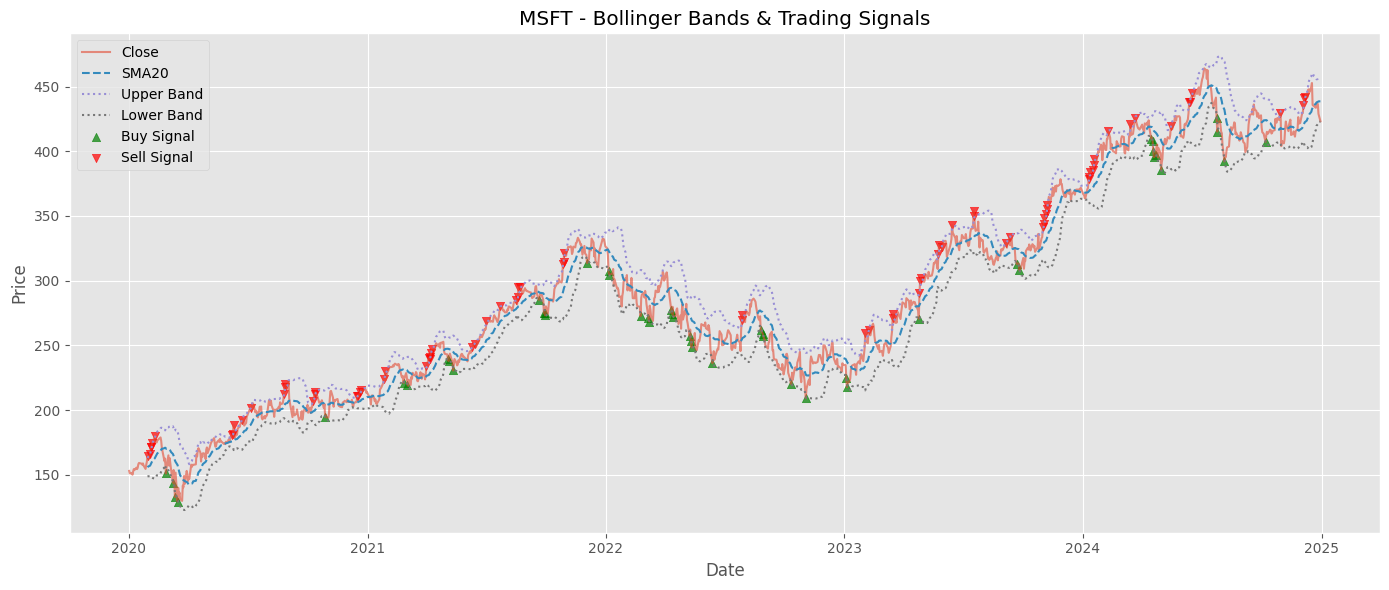

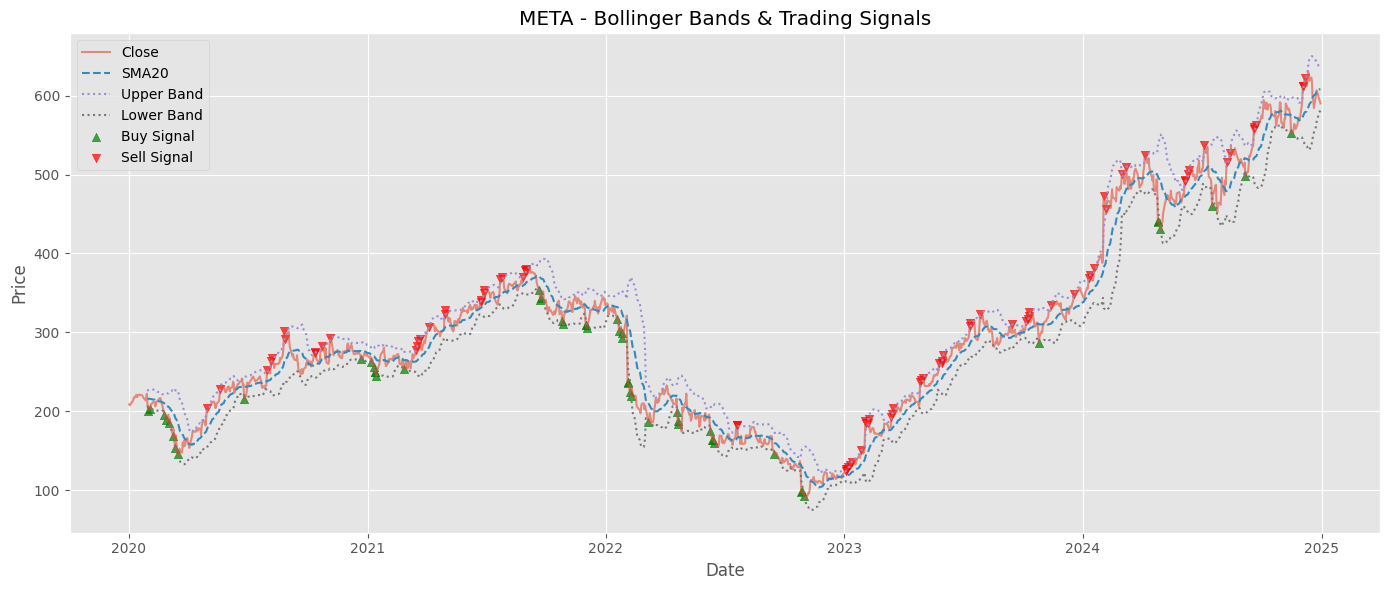

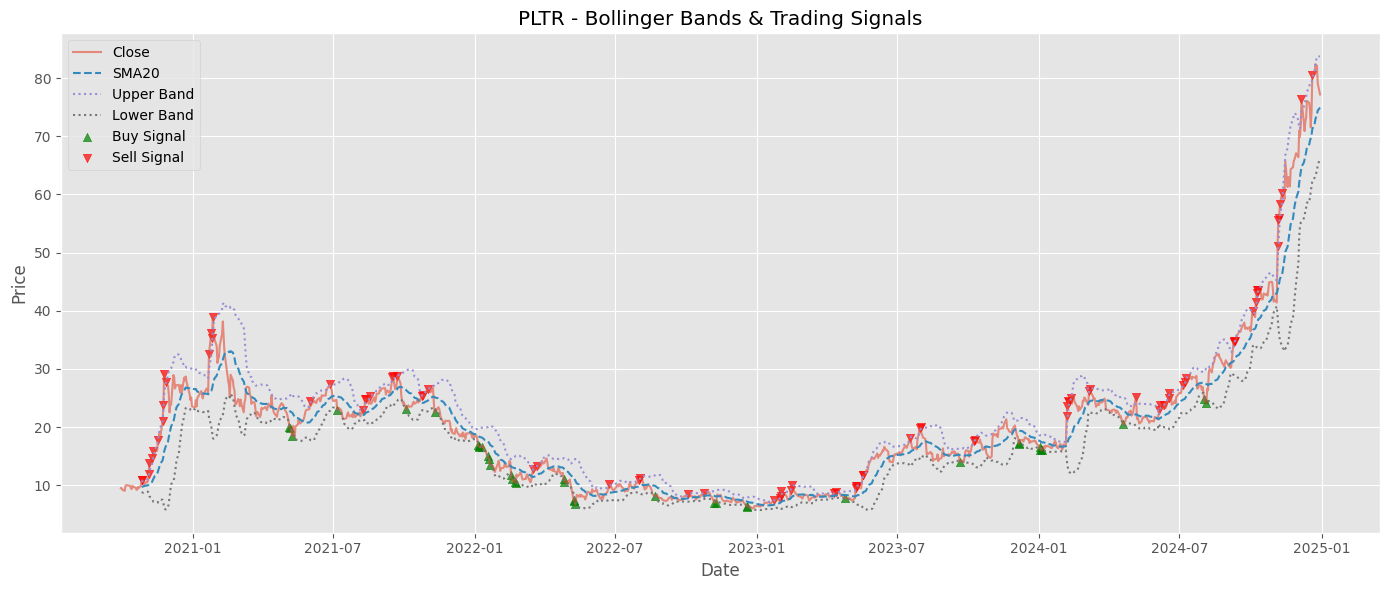

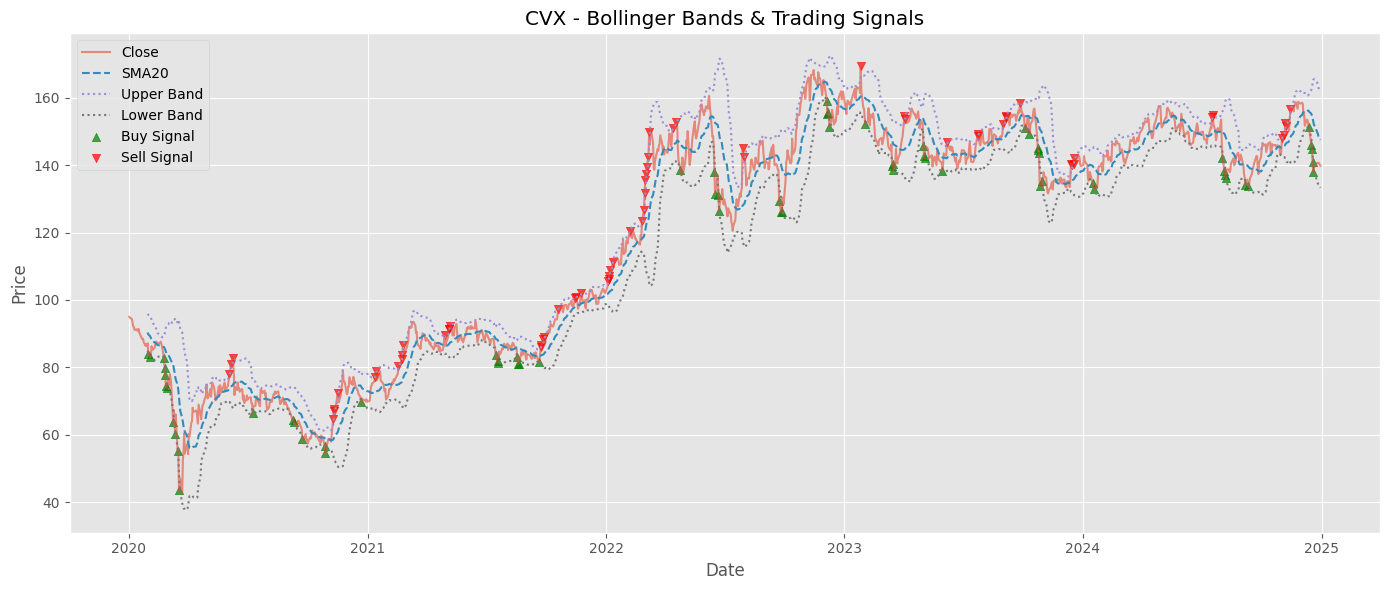

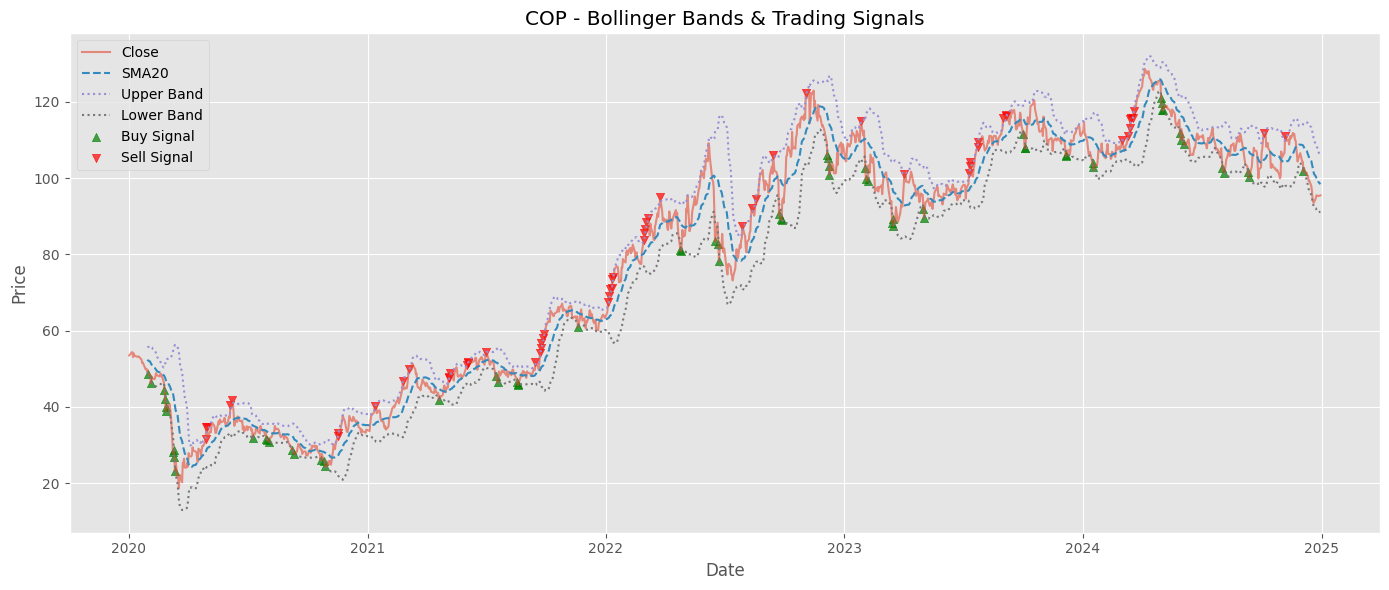

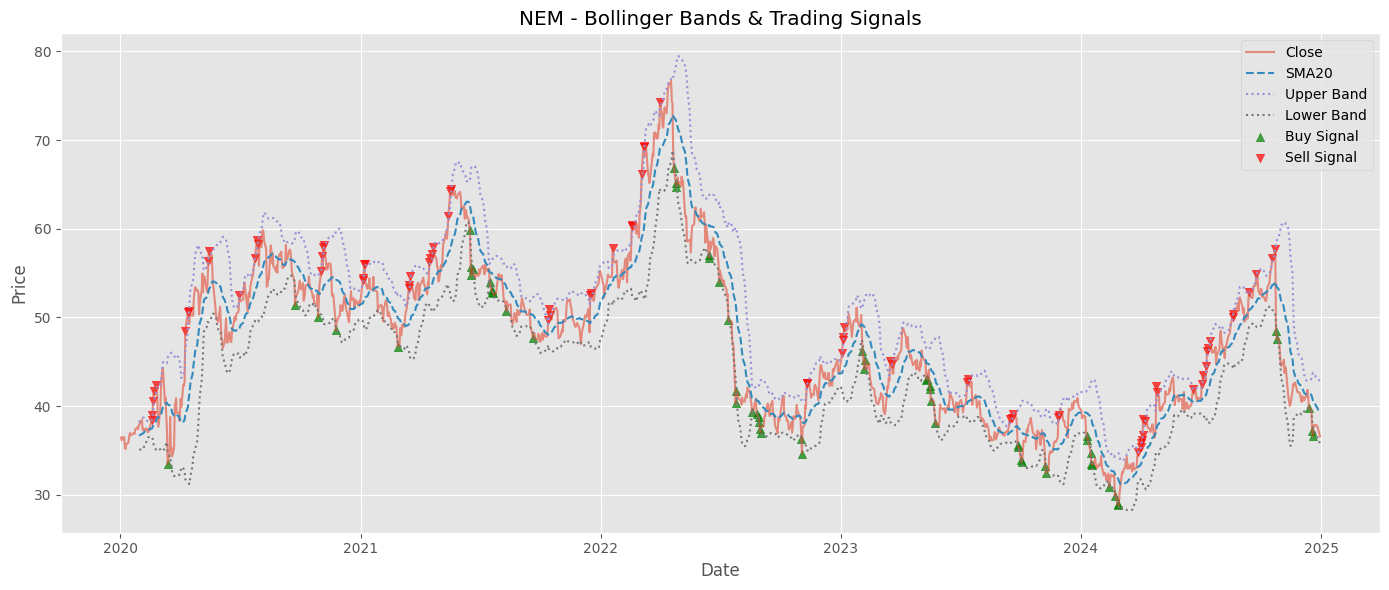

Backtest results saved to: Bollinger_Strategy_Returns.csv
  Ticker  Final Market Return (%)  Final Strategy Return (%)  \
0   NVDA                     0.33                     -23.99   
1    AMD                     0.33                     -23.99   
2    TSM                     0.33                     -23.99   
3   AVGO                     0.33                     -23.99   
4   MSFT                     0.33                     -23.99   
5   META                     0.33                     -23.99   
6   PLTR                     0.33                     -23.99   
7    CVX                     0.33                     -23.99   
8    COP                     0.33                     -23.99   
9    NEM                     0.33                     -23.99   

   Mean Daily Market Return (%)  Mean Daily Strategy Return (%)  \
0                        0.0271                         -0.0068   
1                        0.0271                         -0.0068   
2                        0.0271     

In [64]:
# Load your CSV
multidata = pd.read_csv("multidata.csv")
multidata['Date'] = pd.to_datetime(multidata['Date'])

# Define stock tickers
tickers = ["NVDA", "AMD", "TSM", "AVGO", "MSFT", "META", "PLTR", "CVX", "COP", "NEM"]

# Store Bollinger strategy results
bollinger_results = []

# Loop through each stock
for ticker in tickers:
    df = multidata[multidata['Ticker'] == ticker].copy()
    df.set_index("Date", inplace=True)

    # Calculate Bollinger Bands
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['STD'] = df['Close'].rolling(window=20).std()
    df['Upper'] = df['SMA20'] + 2 * df['STD']
    df['Lower'] = df['SMA20'] - 2 * df['STD']

    # Generate entry signals
    df['Signal'] = 0
    df.loc[df['Close'] < df['Lower'], 'Signal'] = 1    # Buy signal
    df.loc[df['Close'] > df['Upper'], 'Signal'] = -1   # Sell signal

    # Generate positions (exit when mean is crossed)
    df['Position'] = 0
    current_position = 0
    for i in range(1, len(df)):
        if df['Signal'].iloc[i] != 0:
            current_position = df['Signal'].iloc[i]
        elif (current_position == 1 and df['Close'].iloc[i] >= df['SMA20'].iloc[i]) or \
             (current_position == -1 and df['Close'].iloc[i] <= df['SMA20'].iloc[i]):
            current_position = 0
        df.iloc[i, df.columns.get_loc('Position')] = current_position
    df['Position'] = df['Position'].shift(1).fillna(0)

    # Daily returns
    df['Market Return'] = df['Close'].pct_change()
    df['Strategy Return'] = df['Position'] * df['Market Return']

    # Store result
    bollinger_results.append(df[['Close', 'SMA20', 'Upper', 'Lower', 'Signal', 'Position', 'Market Return', 'Strategy Return']])

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close', alpha=0.6)
    plt.plot(df.index, df['SMA20'], label='SMA20', linestyle='--')
    plt.plot(df.index, df['Upper'], label='Upper Band', linestyle=':')
    plt.plot(df.index, df['Lower'], label='Lower Band', linestyle=':')
    plt.scatter(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], marker='^', color='green', label='Buy Signal', alpha=0.7)
    plt.scatter(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], marker='v', color='red', label='Sell Signal', alpha=0.7)
    plt.title(f'{ticker} - Bollinger Bands & Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Combine all into a multi-index DataFrame and export
combined_returns = pd.concat(bollinger_results, keys=tickers, names=['Ticker', 'Date'])
combined_returns.to_csv("Bollinger_Strategy_Returns.csv")
print("Backtest results saved to: Bollinger_Strategy_Returns.csv")

# Store summary results
summary_data = []

for ticker in tickers:
    # Calculate cumulative returns
    df['Cumulative Market'] = (1 + df['Market Return']).cumprod()
    df['Cumulative Strategy'] = (1 + df['Strategy Return']).cumprod()

    summary_data.append({
        "Ticker": ticker,
        "Final Market Return (%)": round((df['Cumulative Market'].iloc[-1] - 1) * 100, 2),
        "Final Strategy Return (%)": round((df['Cumulative Strategy'].iloc[-1] - 1) * 100, 2),
        "Mean Daily Market Return (%)": round(df['Market Return'].mean() * 100, 4),
        "Mean Daily Strategy Return (%)": round(df['Strategy Return'].mean() * 100, 4),
        "Std Daily Market Return (%)": round(df['Market Return'].std() * 100, 4),
        "Std Daily Strategy Return (%)": round(df['Strategy Return'].std() * 100, 4)
    })

# Create and display the summary DataFrame
summary_df = pd.DataFrame(summary_data)
print(summary_df)



## Sharpe Ratio

The Sharpe Ratio is a measure that helps investors understand the risk-adjusted return of an investment. A high Sharpe ratio indicates that the portfolio's returns are higher for each unit of risk taken on. In contrast, a lower Sharpe Ratio indicates a less favorable risk-reward trade-off, with the potential for lower returns relative to the amount of risk being assumed.

The Sharpe Ratio is calculated using annualised portfolio returns, portfolio volatility (as the measure of risk), and the *risk-free rate*. The risk-free rate is often derived from the yield of a theoretically risk-free investment, typically a government bond. The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

### Exercise: Looking Sharpe

Calculate the Sharpe Ratio for our portfolio by applying the formula below.

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

- $R_p$ is our annualised portfolio return
- $R_f$ is the risk-free rate
- $\sigma_p$ is our annualised volatility


In [ ]:
RFR = 0.0438
sharpe = (annualised_return - RFR) / annualised_volatility
print(f"Sharpe Ratio is: {sharpe}")